In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("ImdbDataset\IMDB Dataset.csv")

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [40]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

positive    25000
negative    25000
Name: sentiment, dtype: int64


### data preparation
#### remove html tags and emojis if reqd

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags and non-alphanumeric characters
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove stop words and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens into a string
    return ' '.join(tokens)
    
df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ESHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ESHAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
print(X_train_tfidf)

  (0, 33802)	0.08073181550676357
  (0, 77641)	0.04083887040068199
  (0, 50)	0.03758209953493216
  (0, 8705)	0.07995209790846051
  (0, 65568)	0.05185348094681896
  (0, 80008)	0.06916990539949551
  (0, 59851)	0.07145598290242541
  (0, 21839)	0.10821222360618961
  (0, 48803)	0.07425552344965836
  (0, 2043)	0.04955626309959193
  (0, 59313)	0.07309125337804666
  (0, 26662)	0.06879824526275524
  (0, 52398)	0.08023003985139726
  (0, 22773)	0.08378128819311968
  (0, 83243)	0.06731263469833379
  (0, 37736)	0.06641976910465987
  (0, 19156)	0.04657815265427315
  (0, 3382)	0.05038119100683608
  (0, 57644)	0.032177299745102805
  (0, 31273)	0.035064951717995035
  (0, 2049)	0.037349781288622305
  (0, 39197)	0.05839586220435139
  (0, 11600)	0.07735517880402862
  (0, 35991)	0.059457378323349706
  (0, 73984)	0.08731722227904246
  :	:
  (39999, 61231)	0.07086333772271312
  (39999, 46105)	0.05075225912541189
  (39999, 67991)	0.09026529948106475
  (39999, 66626)	0.0871500226364095
  (39999, 46032)	0.086351

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8958


In [13]:
#save the trained model using the pickle module in Python:
import pickle

# Save the vectorizer and classifier
with open('model.pkl', 'wb') as file:
    pickle.dump((vectorizer, clf), file)

In [14]:
with open('model.pkl', 'rb') as file:
    vectorizer, clf = pickle.load(file)

In [21]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[4363  598]
 [ 444 4595]]


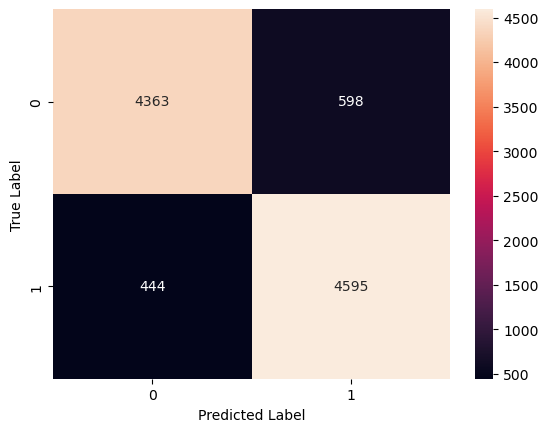

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

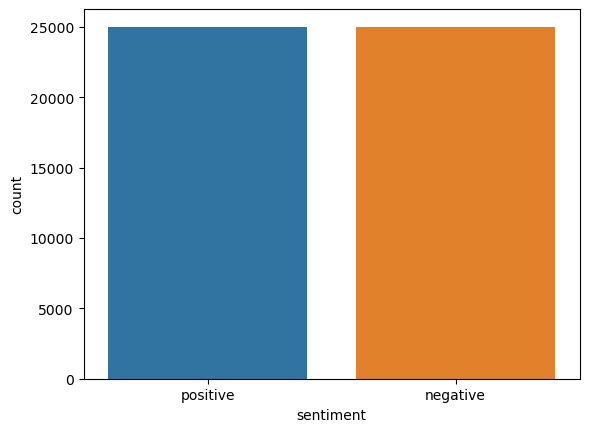

In [22]:
import seaborn as sns

sns.countplot(x='sentiment', data=df)

c:\Users\ESHAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


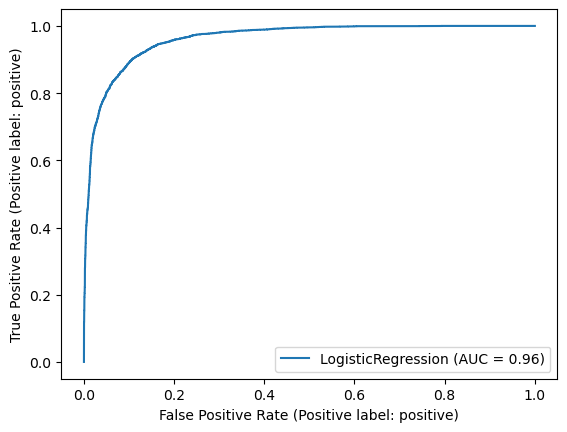

In [30]:
from sklearn.metrics import plot_roc_curve

probas = clf.predict_proba(X_test_tfidf)
plot_roc_curve(clf, X_test_tfidf, y_test)
plt.show()


In [26]:
pip install wordcloud



     ------------------------------------- 153.1/153.1 kB 17.3 kB/s eta 0:00:00


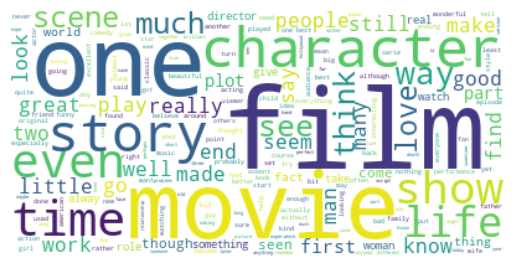

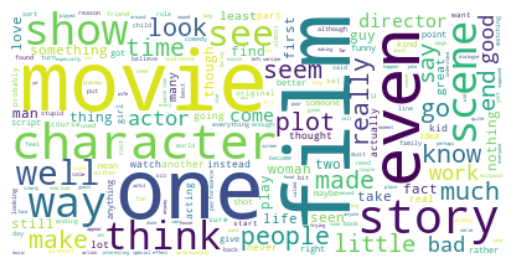

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_reviews = df[df['sentiment']=='positive']
negative_reviews = df[df['sentiment']=='negative']

positive_text = ' '.join(positive_reviews['review'])
negative_text = ' '.join(negative_reviews['review'])

positive_wordcloud = WordCloud(background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
